In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from collections import Counter

from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

Dataset: https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning

In [2]:
df = pd.read_csv("../input/cnn-articles-after-basic-cleaning/CNN_Articels_clean_2/CNN_Articels_clean.csv")
pd.set_option('display.max_columns', None)
proc_df = df.copy()
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [3]:
Counter( proc_df['Category'])

Counter({'news': 18077,
         'business': 854,
         'health': 557,
         'entertainment': 413,
         'sport': 15542,
         'politics': 2461,
         'travel': 39,
         'vr': 5,
         'style': 1})

In [4]:
proc_df = proc_df[proc_df["Category"].str.contains("news|sport|politics") == True]
proc_df.reset_index(drop=True, inplace=True)
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,64,"Ben Morse, CNN",2022-03-21 09:05:42,sport,sport,https://www.cnn.com/2022/03/21/sport/cleveland...,Cleveland Browns defend Deshaun Watson signing...,The Cleveland Browns have defended their signi...,"sport, Cleveland Browns defend Deshaun Watson ...",Cleveland Browns defend Deshaun Watson signing...,(CNN)The Cleveland Browns have defended their...
4,65,"Ben Church, CNN",2022-03-20 18:02:52,sport,motorsport,https://www.cnn.com/2022/03/20/motorsport/bahr...,Bahrain Grand Prix: Ferrari dominates as Charl...,Charles Leclerc won the Bahrain Grand Prix on ...,"motorsport, Bahrain Grand Prix: Ferrari domina...",Bahrain Grand Prix: Ferrari dominates as Charl...,(CNN)Charles Leclerc won the Bahrain Grand Pr...


In [5]:
proc_df['head_desc_head'] = (proc_df["Headline"] + ' ' + proc_df["Description"] + ' ' + proc_df["Second headline"]).str.lower()
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,head_desc_head
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","there's a shortage of truckers, but tusimple t..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,bioservo's robotic 'ironhand' could protect fa...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",this swarm of robots gets smarter the more it ...
3,64,"Ben Morse, CNN",2022-03-21 09:05:42,sport,sport,https://www.cnn.com/2022/03/21/sport/cleveland...,Cleveland Browns defend Deshaun Watson signing...,The Cleveland Browns have defended their signi...,"sport, Cleveland Browns defend Deshaun Watson ...",Cleveland Browns defend Deshaun Watson signing...,(CNN)The Cleveland Browns have defended their...,cleveland browns defend deshaun watson signing...
4,65,"Ben Church, CNN",2022-03-20 18:02:52,sport,motorsport,https://www.cnn.com/2022/03/20/motorsport/bahr...,Bahrain Grand Prix: Ferrari dominates as Charl...,Charles Leclerc won the Bahrain Grand Prix on ...,"motorsport, Bahrain Grand Prix: Ferrari domina...",Bahrain Grand Prix: Ferrari dominates as Charl...,(CNN)Charles Leclerc won the Bahrain Grand Pr...,bahrain grand prix: ferrari dominates as charl...


In [6]:
proc_df['head_desc_head'] = proc_df['head_desc_head'].str.replace('https*\S+', '')
proc_df['head_desc_head'] = proc_df['head_desc_head'].str.replace('[^A-Za-z]', ' ')
proc_df['head_desc_head'] = proc_df['head_desc_head'].str.replace('\s{2,}', ' ')

stop_words = stopwords.words("english")
stop_words.append('u')
stop_words.append('cnn')
proc_df['head_desc_head'] = proc_df['head_desc_head'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# category_textes = {}

# for category in ['news', 'sport', 'politics']:
#     category_textes[category] = ' '.join(proc_df['head_desc_head'][proc_df['Category'] == category])


In [8]:
proc_df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,head_desc_head
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",shortage truckers tusimple thinks solution dri...
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,bioservo robotic ironhand could protect factor...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",swarm robots gets smarter works hong kong ware...
3,64,"Ben Morse, CNN",2022-03-21 09:05:42,sport,sport,https://www.cnn.com/2022/03/21/sport/cleveland...,Cleveland Browns defend Deshaun Watson signing...,The Cleveland Browns have defended their signi...,"sport, Cleveland Browns defend Deshaun Watson ...",Cleveland Browns defend Deshaun Watson signing...,(CNN)The Cleveland Browns have defended their...,cleveland browns defend deshaun watson signing...
4,65,"Ben Church, CNN",2022-03-20 18:02:52,sport,motorsport,https://www.cnn.com/2022/03/20/motorsport/bahr...,Bahrain Grand Prix: Ferrari dominates as Charl...,Charles Leclerc won the Bahrain Grand Prix on ...,"motorsport, Bahrain Grand Prix: Ferrari domina...",Bahrain Grand Prix: Ferrari dominates as Charl...,(CNN)Charles Leclerc won the Bahrain Grand Pr...,bahrain grand prix ferrari dominates charles l...


In [9]:
texts = []
labels = []
for i, сategory in enumerate(proc_df['Category']):
    texts.append(proc_df['head_desc_head'][i])
    if сategory == 'news':
        labels.append(0)
    if сategory == 'sport':
        labels.append(1)
    if сategory == 'politics':
        labels.append(2)

texts = np.asarray(texts)
labels = np.asarray(labels).astype('float32')


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 36080
number of labels:  36080


In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_unique_words = len(tokenizer.word_index) + 1
print("Found {} unique words: ".format(len(word_index)))

data = pad_sequences(sequences)

print("data shape: ", data.shape)

Found 39002 unique words: 
data shape:  (36080, 76)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [12]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(
#         input_dim=num_unique_words,
#         output_dim=256,
#         mask_zero=True),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
mc = tf.keras.callbacks.ModelCheckpoint('best_model', monitor='val_loss', mode='min', save_best_only=True)


model = Sequential()
model.add(Embedding(num_unique_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
history_rnn = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2, callbacks=[mc])

2022-12-24 01:52:06.943429: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-24 01:52:07.175877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
337/337 [==============================] - 10s 26ms/step - loss: 0.4738 - accuracy: 0.7986 - val_loss: 0.1596 - val_accuracy: 0.9470


2022-12-24 01:52:17.871529: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/10
337/337 [==============================] - 10s 29ms/step - loss: 0.2098 - accuracy: 0.9401 - val_loss: 0.1380 - val_accuracy: 0.9555
Epoch 3/10
337/337 [==============================] - 9s 26ms/step - loss: 0.0354 - accuracy: 0.9917 - val_loss: 0.1158 - val_accuracy: 0.9622
Epoch 4/10
337/337 [==============================] - 8s 24ms/step - loss: 0.0124 - accuracy: 0.9978 - val_loss: 0.1175 - val_accuracy: 0.9656
Epoch 5/10
337/337 [==============================] - 8s 24ms/step - loss: 0.0067 - accuracy: 0.9990 - val_loss: 0.1385 - val_accuracy: 0.9572
Epoch 6/10
337/337 [==============================] - 8s 24ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.1426 - val_accuracy: 0.9638
Epoch 7/10
337/337 [==============================] - 9s 25ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.1514 - val_accuracy: 0.9630
Epoch 8/10
337/337 [==============================] - 8s 25ms/step - loss: 8.1289e-04 - accuracy: 0.9999 - val_loss: 0.1620 - val_accuracy: 0

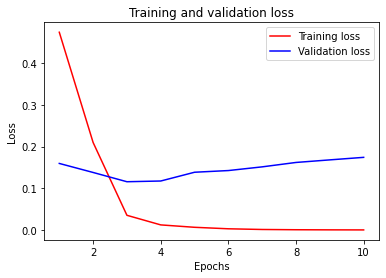

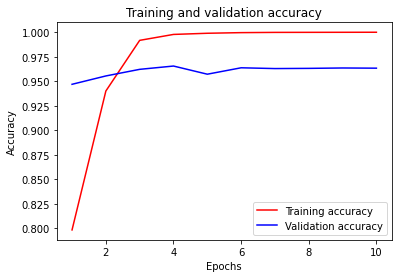

In [13]:
history_dict = history_rnn.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, color="red", label="Training loss")
plt.plot(epochs, val_loss_values, color="blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, acc, color="red", label="Training accuracy")
plt.plot(epochs, val_acc, color="blue", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()